<font size='10'>RNN</font>

In [1]:
import pandas as pd , scipy, numpy #import the required libraries
from sklearn import preprocessing,svm
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder 
#from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
data=pd.read_csv( "sdn.csv")# create dataframe
pd.options.display.max_columns = None
data=data.loc[:,'switch':'label']#slicing through columns of dataset
data = data[data['pktrate'] !=0]#dropping rows  
data['src'] = [int(i.split('.')[3]) for i in data['src']]#extracting the last two digits 
data['dst'] = [int(i.split('.')[3])for i in data['dst']]#extracting the last two digits
data = data.sort_values(by ='switch' ) #rearranging data as per switch id
data['switch'] = data['switch'].astype(str) 
data['src'] = data['src'].astype(str)
data['dst'] = data['dst'].astype(str)
data['port_no'] = data['port_no'].astype(str)
data['Protocol'] = data['Protocol'].astype(str)
data

,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,1,1,8,45304,48294064,100,716000000,1.007160e+11,3,1943,13535,14428310,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
19662,1,4,3,116271,121154382,417,495000000,4.174950e+11,2,4440,8120,8461040,270,0,UDP,2,4587,143906528,0,0.0,0.0,1
19663,1,4,3,116271,121154382,417,495000000,4.174950e+11,2,4440,8120,8461040,270,0,UDP,1,4881,264605852,0,2222.0,2222.0,1
19664,1,4,3,116271,121154382,417,495000000,4.174950e+11,2,4440,8120,8461040,270,0,UDP,2,3483,3903,0,0.0,0.0,1
19665,1,2,3,43073,45915818,95,671000000,9.567100e+10,3,4440,13601,14498666,453,0,UDP,3,245258049,4337,2529,0.0,2529.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40938,10,16,12,112970,6100380,367,25000000,3.670250e+11,5,16567,8905,480870,296,1,TCP,2,5707161,5309556,138,128.0,266.0,1
40937,10,16,12,112970,6100380,367,25000000,3.670250e+11,5,16567,8905,480870,296,1,TCP,1,6609951,6150264,137,128.0,265.0,1
40936,10,12,16,113428,6578824,371,762000000,3.717620e+11,5,16567,8905,516490,296,1,TCP,3,11460323,12310769,256,275.0,531.0,1
40733,10,17,12,70525,3808350,222,56000000,2.220560e+11,5,16567,8875,479250,295,1,TCP,3,8611619,9251081,254,273.0,527.0,1


In [2]:
data_order = pd.get_dummies(data,columns = ['switch','src','Protocol','dst','port_no'])
data_order=data_order.drop(['port_no_5','switch_10','src_20','dst_17'],axis = 'columns')

cols_to_norm = ['pktcount','bytecount','dur','dur_nsec','tot_dur','packetins','pktperflow','byteperflow','pktrate','flows','tx_bytes','rx_bytes','tx_kbps','rx_kbps','tot_kbps']
data_order[cols_to_norm]=(data_order[cols_to_norm]-data_order[cols_to_norm].min())/(data_order[cols_to_norm].max()-data_order[cols_to_norm].min())
data_order.fillna(data_order.mean(), inplace=True)
import tensorflow as tf
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda,Bidirectional
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K

from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics


Using TensorFlow backend.


In [3]:
# split into input (X) and output (Y) variables, splitting csv data
x = data_order.drop('label',axis=1)
y = data_order.label

# split X, Y into a train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)
x_train=x_train.reshape(41996, 66,1)
x_test=x_test.reshape(10500, 66,1)

In [20]:
print('Build model...')
model = Sequential()
model.add(LSTM(80, return_sequences=False, input_shape=(66,1)))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.add(Activation('sigmoid'))

Build model...


In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [22]:
history=model.fit(x_train, y_train, epochs = 20, batch_size=64,validation_data=(x_test, y_test),verbose=1)

Train on 41996 samples, validate on 10500 samples
Epoch 1/20
41996/41996 [==============================] - 77s 2ms/step - loss: 0.6184 - acc: 0.6484 - val_loss: 0.8651 - val_acc: 0.5848
Epoch 2/20
41996/41996 [==============================] - 75s 2ms/step - loss: 0.4024 - acc: 0.8157 - val_loss: 0.2338 - val_acc: 0.9098
Epoch 3/20
41996/41996 [==============================] - 76s 2ms/step - loss: 0.1493 - acc: 0.9514 - val_loss: 0.1598 - val_acc: 0.9368
Epoch 4/20
41996/41996 [==============================] - 76s 2ms/step - loss: 0.1063 - acc: 0.9669 - val_loss: 0.0976 - val_acc: 0.9720
Epoch 5/20
41996/41996 [==============================] - 77s 2ms/step - loss: 0.0897 - acc: 0.9723 - val_loss: 0.0869 - val_acc: 0.9712
Epoch 6/20
41996/41996 [==============================] - 78s 2ms/step - loss: 0.0678 - acc: 0.9788 - val_loss: 0.0930 - val_acc: 0.9675
Epoch 7/20
41996/41996 [==============================] - 71s 2ms/step - loss: 0.0721 - acc: 0.9783 - val_loss: 0.0553 - val_acc

In [23]:
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

10500/10500 [==============================] - 5s 435us/step
Accuracy: 99.10%


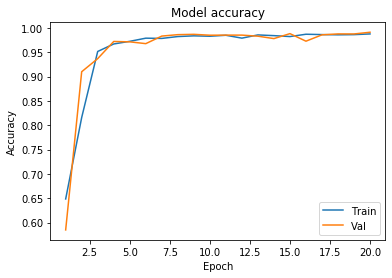

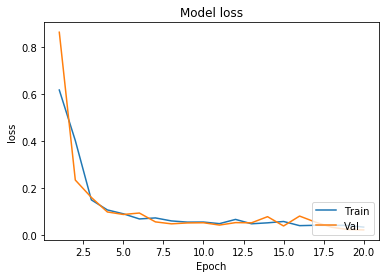

In [26]:
epochs=20
def plot_learningCurve(history,epochs):
    #Plot training and validation accuracy values
    epochs_range=range(1,epochs+1)
    plt.plot(epochs_range,history.history['acc'])
    plt.plot(epochs_range,history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='lower right')
    plt.show()
    #Plot training and validation loss values
    plt.plot(epochs_range,history.history['loss'])
    plt.plot(epochs_range,history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='lower right')
    plt.show()
plot_learningCurve(history,epochs)